# <font color='green' size=6> **Решающие деревья для задачи классификации**



In [2]:
# Импорт необходимых библиотек
import numpy as np  # Библиотека для числовых вычислений
import pandas as pd  # Библиотека для работы с данными

# Импорт наборов данных
from sklearn.datasets import load_wine

from sklearn.tree import (
    DecisionTreeClassifier,  # Классификатор на основе дерева решений
    plot_tree,  # Функция для визуализации дерева решений
    export_text  # Функция для экспорта дерева решений в текстовом формате
)

# Импорт инструментов для оптимизации гиперпараметров
from sklearn.model_selection import GridSearchCV  # Поиск по сетке для оптимизации гиперпараметров

# Импорт функций для визуализации дерева решений
from sklearn.tree import export_graphviz  # Функция для экспорта дерева решений в формат Graphviz
import graphviz  # Библиотека для визуализации графов

# Импорт метрик для оценки качества моделей
from sklearn.metrics import (
    accuracy_score,  # Метрика точности для классификации
    mean_squared_error,  # Средняя квадратичная ошибка для регрессии
    r2_score,  # Коэффициент детерминации для регрессии
    classification_report  # Отчет о классификации
)

# Импорт функций для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импорт библиотеки для визуализации
import matplotlib.pyplot as plt  # Библиотека для создания графиков
from mlxtend.plotting import plot_decision_regions  # Функция для визуализации границ решений


In [3]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8)

In [4]:
# фиксируем для вопроизводимости
my_random_state = 12345

## <font size=6 color='green'> **Классификация с помощью решающих деревьев**

In [5]:
# Загрузка датасета Вин
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [6]:
X = pd.DataFrame(data=wine.data, columns=wine.feature_names)
y = wine.target
print(f"X shape: {X.shape}, Y shape: {y.shape}")
X.head()

X shape: (178, 13), Y shape: (178,)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


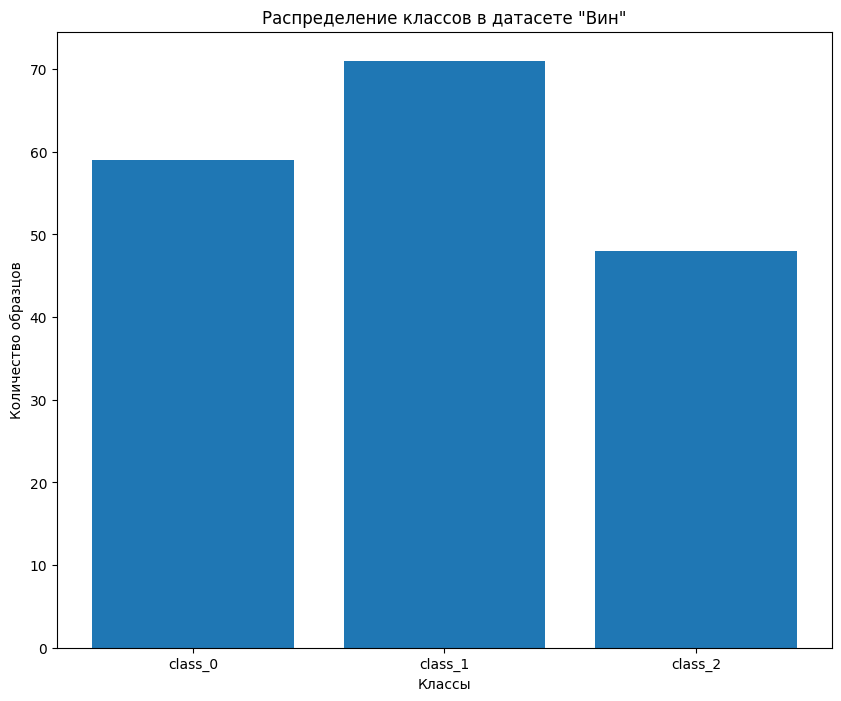

In [7]:
# Посчитаем количество образцов для каждого класса
unique_classes, counts = np.unique(y, return_counts=True)

# Отобразим бар-плот
plt.bar(unique_classes, counts, tick_label=wine.target_names)
plt.xlabel('Классы')
plt.ylabel('Количество образцов')
plt.title('Распределение классов в датасете "Вин"')
plt.show()

Описание признаков (характеристик):

- Alcohol (Алкоголь): содержание алкоголя в вине (% по объему)
- Malic Acid (Яблочная кислота): содержание яблочной кислоты в вине (г/л)
- Ash (Зольность): содержание минералов, представленное зольностью (% по массе)
- Alcalinity of Ash (Щелочность золы): общая щелочность золы (г/л)
- Magnesium (Магний): содержание магния в вине (мг/л)
Total Phenols (Общие фенолы): общее содержание фенолов в вине (г/л)
- Flavanoids (Флавоноиды): содержание флавоноидов в вине (г/л)
- Nonflavanoid Phenols (Нефлавоноидные фенолы): содержание нефлавоноидных фенолов в вине (г/л)
- Proanthocyanins (Проантоцианидины): содержание проантоцианидинов в вине (г/л)
- Color Intensity (Интенсивность цвета): интенсивность цвета виноградного сока (от 1 до 10)
- Hue (Оттенок): оттенок вина, измеренный в градусах от 0 до 360
- OD280/OD315 of diluted wines (OD280/OD315 разбавленных вин): соотношение оптической плотности разбавленных вин при длине волны 280/315 нм
- Proline (Пролин): содержание пролина в вине (мг/л)

**Целевая переменная (классы):**

- Class_0: сорт 1
- Class_1: сорт 2
- Class_2: сорт 3


In [59]:
X.isnull().mean()

alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines    0.0
proline                         0.0
dtype: float64

In [8]:
# Разделение данных на обучающую и тестовую выборки
# test_size=0.3 означает, что 30% данных будут использованы для тестирования
# random_state для воспроизводимости результатов
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=my_random_state
)

# Создание классификатора на основе дерева решений
# max_depth=2 ограничивает глубину дерева до двух уровней
# random_state для воспроизводимости результатов
dt_classifier = DecisionTreeClassifier(max_depth=2, random_state=my_random_state)

# Обучение классификатора на обучающих данных
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=12345)

In [9]:
# Получение предсказанных меток классов на тестовой выборке
y_pred_test = dt_classifier.predict(X_test)
y_pred_train = dt_classifier.predict(X_train)
# Вычисление точности
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_train, accuracy_test

(0.9112903225806451, 0.7407407407407407)

In [10]:
# Предсказание вероятностей на обучающих данных
y_pred_proba = dt_classifier.predict_proba(X_test)

# Расчет Gini-impurity для корневого узла (весь набор данных)
class_probabilities = np.mean(y_pred_proba, axis=0)
gini_impurity = 1 - np.sum(np.square(class_probabilities))
print(f"Gini-impurity для корневого узла: {gini_impurity}")

# Для остальных узлов необходимо доступ к внутренним структурам дерева

Gini-impurity для корневого узла: 0.6243243923074329


Gini-impurity равен 0.6243243923074329, что указывает на умеренный уровень неоднородности в корневом узле. Это означает, что классы в корневом узле смешаны, но не равномерно распределены.

In [11]:
# Рассчитать логарифмическую потерю
from sklearn.metrics import log_loss as sk_log_loss
log_loss_value = sk_log_loss(y_test, y_pred_proba)
print(f"Логарифмическая потеря: {log_loss_value}")

Логарифмическая потеря: 0.739853568690224


Высокое значение (например, 0.739853568690224) говорит о том, что модель не очень точно предсказывает вероятности, и они значительно отклоняются от истинных значений.

## Ранняя остановка

### <font size=5 color='green'> Параметр максимальная глубина (max_depth)

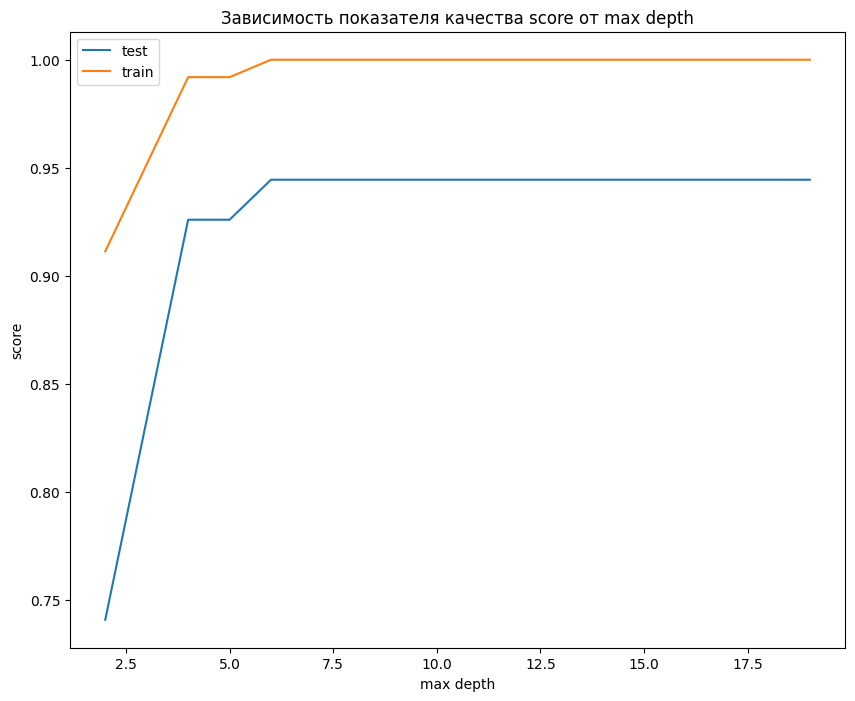

In [12]:
max_depth_array = range(2, 20)
score_array_test = []
score_array_train = []

for max_depth in max_depth_array:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=my_random_state)
    dt.fit(X_train, y_train)
    score_array_test.append(accuracy_score(y_test, dt.predict(X_test)))
    score_array_train.append(accuracy_score(y_train, dt.predict(X_train)))

plt.plot(max_depth_array, score_array_test, label='test')
plt.plot(max_depth_array, score_array_train, label='train')
plt.title("Зависимость показателя качества score от max depth")
plt.xlabel("max depth")
plt.ylabel("score")
plt.legend()
plt.show()

Лучшее значение max_depth: 5
Лучшая точность на валидационной выборке: 0.8793333333333333


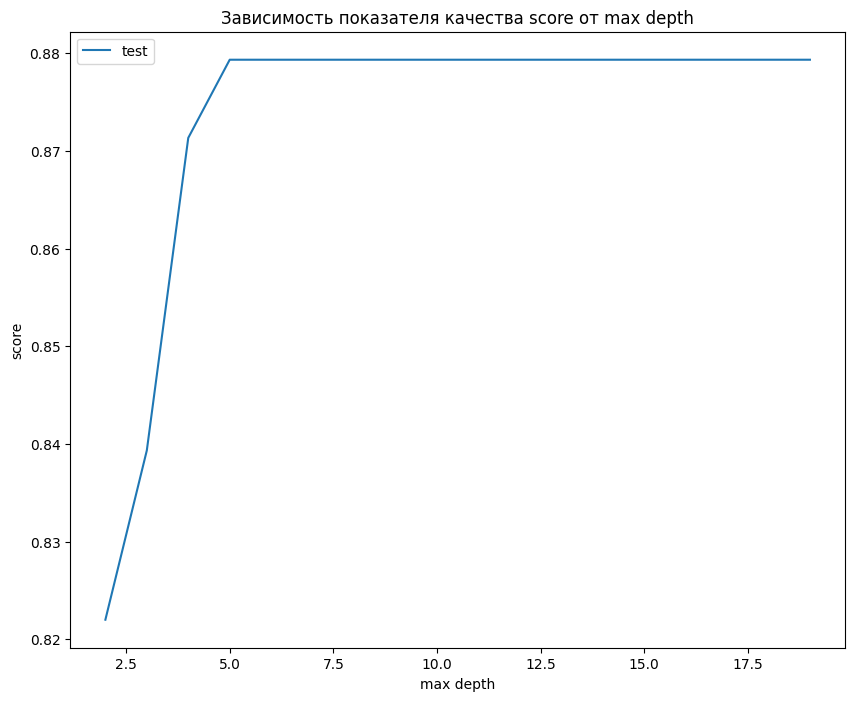

Точность на тестовой выборке с лучшим max_depth: 0.9259259259259259


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Определение диапазона значений для max_depth
param_grid = {'max_depth': range(2, 20)}

# Создание дерева решений и поиск по сетке
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=my_random_state),
    param_grid,
    cv=5,  # Кросс-валидация с 5 складами
    scoring='accuracy'  # Метрика качества
)

# Запуск поиска по сетке
grid_search.fit(X_train, y_train)

# Получение лучшего значения max_depth и соответствующей точности
best_max_depth = grid_search.best_params_['max_depth']
best_score = grid_search.best_score_

print(f"Лучшее значение max_depth: {best_max_depth}")
print(f"Лучшая точность на валидационной выборке: {best_score}")

# Построение графика зависимости точности от max_depth
plt.plot(param_grid['max_depth'], grid_search.cv_results_['mean_test_score'], label='test')
# plt.plot(param_grid['max_depth'], grid_search.cv_results_['mean_train_score'], label='train')
plt.title("Зависимость показателя качества score от max depth")
plt.xlabel("max depth")
plt.ylabel("score")
plt.legend()
plt.show()

# Оценка модели на тестовой выборке с лучшим max_depth
best_dt = DecisionTreeClassifier(max_depth=best_max_depth, random_state=my_random_state)
best_dt.fit(X_train, y_train)
test_score = accuracy_score(y_test, best_dt.predict(X_test))
print(f"Точность на тестовой выборке с лучшим max_depth: {test_score}")


In [14]:
grid_search.cv_results_

{'mean_fit_time': array([0.00286598, 0.00061259, 0.00356946, 0.00200534, 0.0003459 ,
        0.        , 0.0032238 , 0.00322566, 0.        , 0.00321007,
        0.00319004, 0.        , 0.        , 0.00636888, 0.00314126,
        0.00314603, 0.00317783, 0.00063152]),
 'std_fit_time': array([3.70948583e-04, 1.22518539e-03, 4.69776695e-03, 1.06985937e-05,
        4.31735994e-04, 0.00000000e+00, 6.44760132e-03, 6.45132065e-03,
        0.00000000e+00, 6.42013550e-03, 6.38008118e-03, 0.00000000e+00,
        0.00000000e+00, 7.80083435e-03, 6.28252029e-03, 6.29205704e-03,
        6.35566711e-03, 1.06300924e-03]),
 'mean_score_time': array([0.00257382, 0.000351  , 0.00120449, 0.00100031, 0.00039296,
        0.00304847, 0.        , 0.00315232, 0.00317326, 0.        ,
        0.        , 0.00319295, 0.00143948, 0.        , 0.        ,
        0.        , 0.        , 0.00104113]),
 'std_score_time': array([7.32990143e-04, 7.01999664e-04, 7.53341715e-04, 3.33990307e-06,
        7.85923004e-04, 6.09

In [15]:
pd.DataFrame({"max_depth": max_depth_array, "score": score_array_test}).sort_values(
    by="score"
).reset_index(drop=True).sort_values('max_depth')

,max_depth,score
0,2,0.740741
1,3,0.833333
2,4,0.925926
3,5,0.925926
15,6,0.944444
14,7,0.944444
13,8,0.944444
12,9,0.944444
10,10,0.944444
16,11,0.944444


### <font size=5 color='green'> Минимальный размер листа

In [68]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

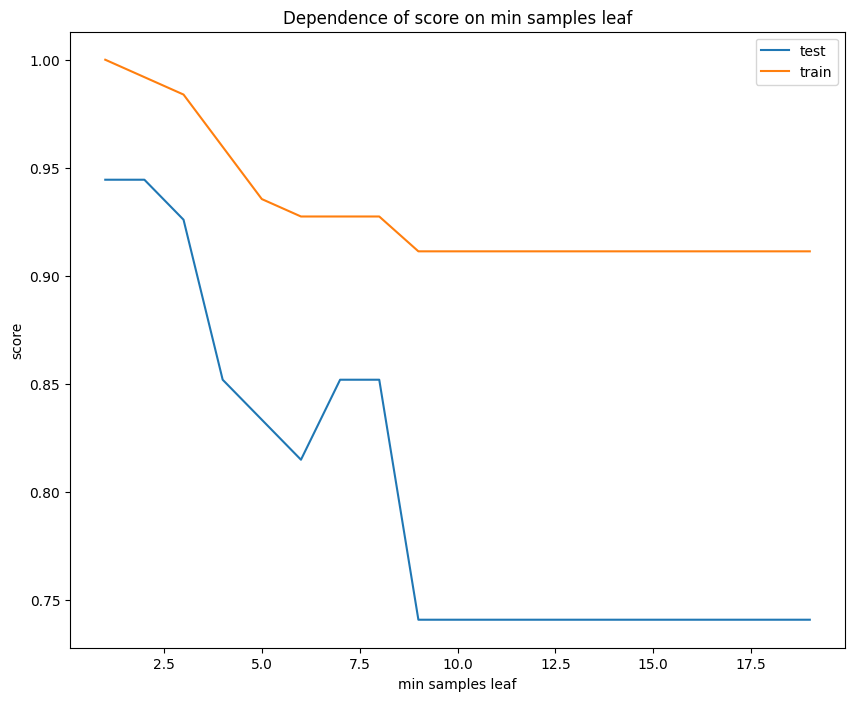

In [65]:
min_samples_leaf_array = range(1, 20)
score_array_test = []
score_array_train = []

for min_samples_leaf in min_samples_leaf_array:
    dt = DecisionTreeClassifier(
        max_depth=None, min_samples_leaf=min_samples_leaf, random_state=my_random_state
    )
    dt.fit(X_train, y_train)
    score_array_test.append(accuracy_score(y_test, dt.predict(X_test)))
    score_array_train.append(accuracy_score(y_train, dt.predict(X_train)))

plt.plot(min_samples_leaf_array, score_array_test, label='test')
plt.plot(min_samples_leaf_array, score_array_train, label='train')
plt.title("Dependence of score on min samples leaf")
plt.xlabel("min samples leaf")
plt.ylabel("score")
plt.legend()
plt.show()

In [66]:
len(score_array_train)

19

In [63]:
len(min_samples_leaf_array)

19

In [67]:
pd.DataFrame({"min_samples_leaf": min_samples_leaf_array, "score": score_array_test}).sort_values(
    by="score"
).reset_index(drop=True).sort_values('min_samples_leaf')

,min_samples_leaf,score
18,1,0.944444
17,2,0.944444
16,3,0.925926
15,4,0.851852
12,5,0.833333
11,6,0.814815
14,7,0.851852
13,8,0.851852
10,9,0.740741
0,10,0.740741


### <font size=5 color='green'> Минимальный размер узла, который можно разделить

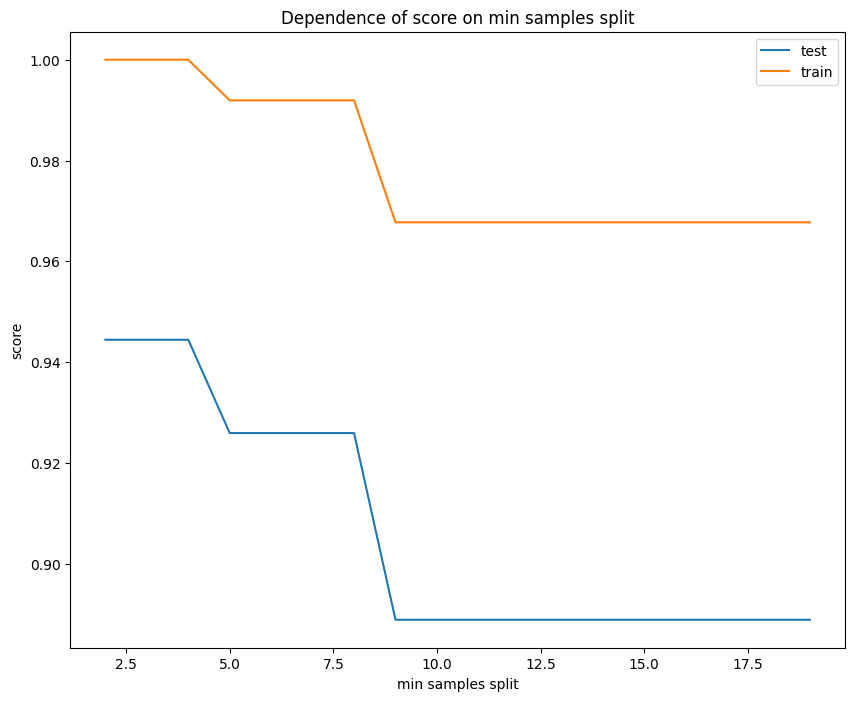

In [69]:
min_samples_split_array = range(2, 20)
score_array_test = []
score_array_train = []

# минимум объетов для разбиения внутри узла
for min_samples_split in min_samples_split_array:
    dt = DecisionTreeClassifier(
        max_depth=None, min_samples_split=min_samples_split, random_state=my_random_state
    )
    dt.fit(X_train, y_train)
    score_array_test.append(accuracy_score(y_test, dt.predict(X_test)))
    score_array_train.append(accuracy_score(y_train, dt.predict(X_train)))

plt.plot(min_samples_split_array, score_array_test, label='test')
plt.plot(min_samples_split_array, score_array_train, label='train')
plt.title("Dependence of score on min samples split")
plt.xlabel("min samples split")
plt.ylabel("score")
plt.legend()
plt.show()

In [70]:
pd.DataFrame({"min_samples_split": min_samples_split_array, "score": score_array_test}).sort_values(
    by="score"
).reset_index(drop=True).sort_values('min_samples_split')

,min_samples_split,score
17,2,0.944444
16,3,0.944444
15,4,0.944444
14,5,0.925926
13,6,0.925926
12,7,0.925926
11,8,0.925926
9,9,0.888889
0,10,0.888889
7,11,0.888889


##<font size=6 color='green'> **Cost Complexity Pruning**

Общая impurity дерева $ R(T) $ - это сумма impurity всех листовых узлов дерева, взвешенная по количеству наблюдений в каждом узле. Для дерева $ T $, состоящего из $ m $ листовых узлов, общая impurity определяется как:

$$R(T) = \sum_{i=1}^{m} N_i \cdot I(t_i)$$

где:

- $N_i$ - количество наблюдений в узле $t_i$.
- $I(t_i)$ - impurity узла $t_i $


Формула Cost Complexity используется для обрезки дерева решений. Обрезка осуществляется путем минимизации следующей функции стоимости:

$$R_{\alpha}(T) = R(T) + \alpha \cdot |T|$$

-$ R_{\alpha}(T) $ - это стоимость дерева $ T $ с учетом стоимости сложности.
- $ R(T) $ - это общая impurity дерева $ T $.
- $ \alpha $ -  параметр  сложности.
- $ |T| $ - количество узлов в дереве $ T $.


In [18]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train) # путь обрезки дерева, сложность затрат, Cost Complexity 
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

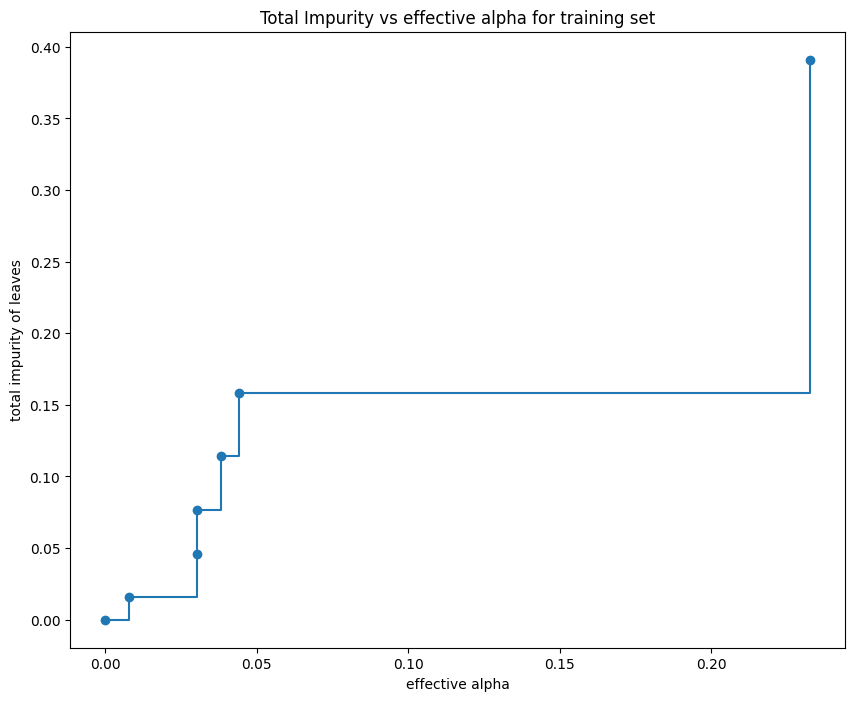

In [19]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Чем меньше $α$, тем чище листы деревье, то есть меньше ошибка

In [71]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

In [20]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(f'Number of nodes in the last tree is: {clfs[-1].tree_.node_count} with ccp_alpha: {ccp_alphas[-1]}')

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2607989045293935


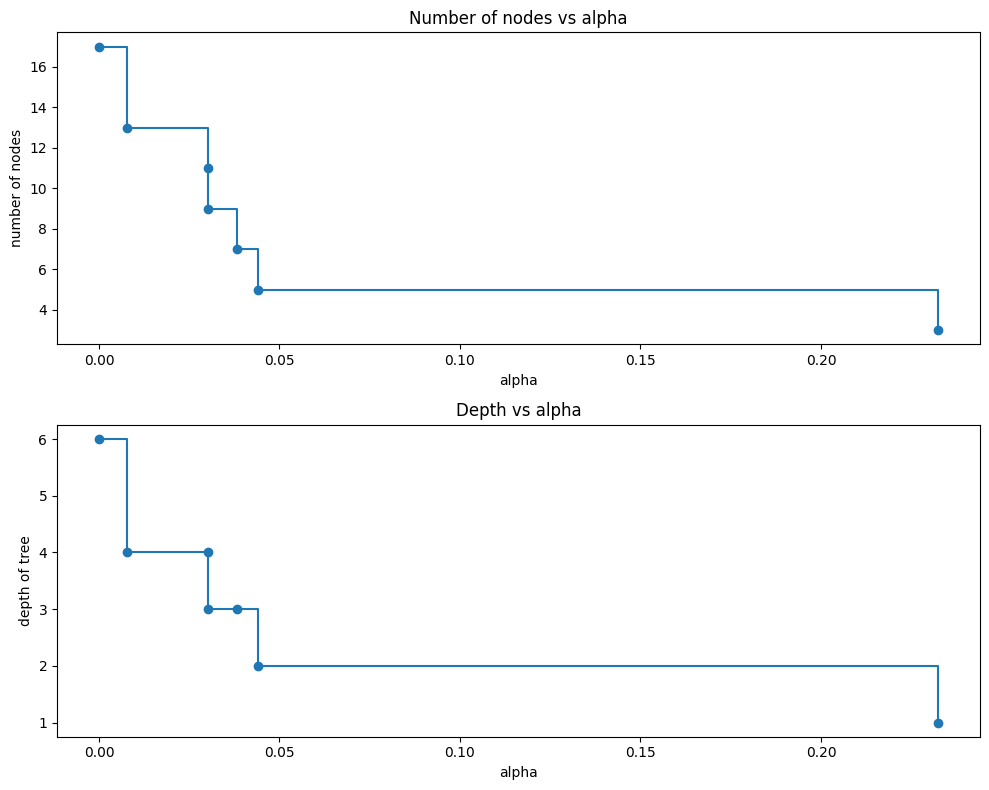

In [21]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

[0.         0.00789651 0.03024194 0.03033602 0.03820078 0.04398827
 0.23243608]


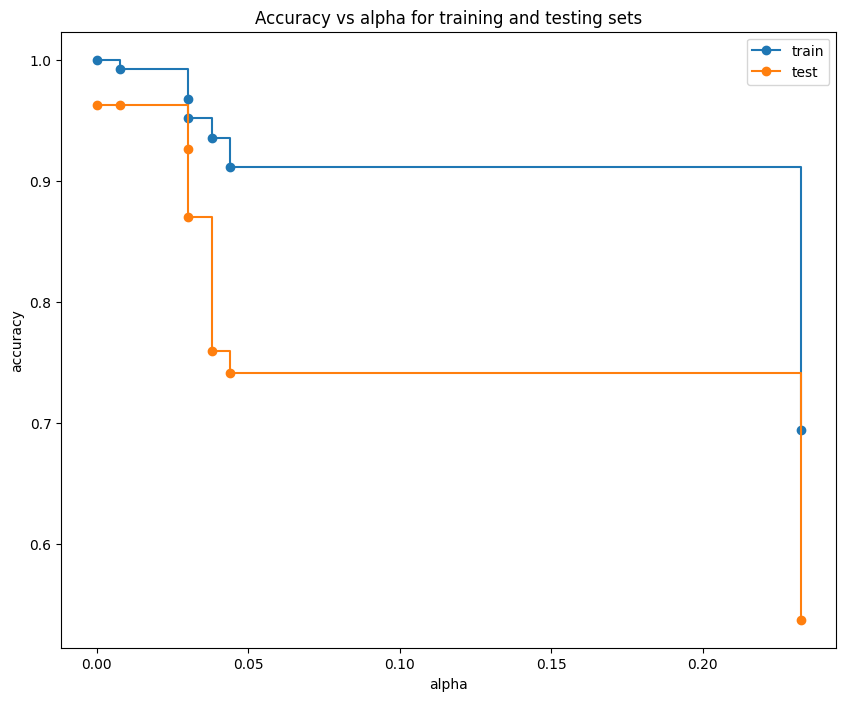

In [22]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
print(ccp_alphas)
plt.show()


# <font size=6 color='green'> **Подбор гиперпараметров**

In [23]:
dt_classifier = DecisionTreeClassifier()

In [24]:
# Определение сетки параметров для GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [25]:
# Создаем объект GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, n_jobs=-1)


In [26]:
# Обучаем GridSearch на обучающей выборке
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [27]:
# Выводим наилучшие параметры и точность на тестовой выборке
print("Наилучшие параметры: ", grid_search.best_params_)
print("Точность на тестовой выборке: ", grid_search.best_score_)

Наилучшие параметры:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Точность на тестовой выборке:  0.9356666666666665


In [28]:
# Преобразуем результаты GridSearchCV в DataFrame
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007782,0.001801,0.005548,0.001483,gini,None,1,2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.92,0.92,0.76,0.88,0.916667,0.879333,0.061550,61
1,0.006876,0.000900,0.003742,0.000892,gini,None,1,5,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.84,0.92,0.76,0.88,0.958333,0.871667,0.068394,65
2,0.005687,0.001448,0.003954,0.000101,gini,None,1,10,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.88,0.92,0.68,0.88,0.916667,0.855333,0.089333,80
3,0.005693,0.000942,0.004025,0.000002,gini,None,2,2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.92,0.92,0.84,0.88,0.916667,0.895333,0.031524,45
4,0.005939,0.000617,0.003988,0.001716,gini,None,2,5,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.80,0.92,0.84,0.88,0.958333,0.879667,0.056099,59


In [29]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


In [30]:
dt_classifier = DecisionTreeClassifier(**grid_search.best_params_)

# Выполняем кросс-валидацию с k фолдами (k-fold cross-validation)
# cv=k означает, что данные разделятся на k частей, и k раз происходит обучение и оценка модели
# scoring='accuracy' означает, что оценка производится на основе точности классификации
k = 5
scores = cross_val_score(clf, X, y, cv=k, scoring='accuracy')

# Выводим результаты кросс-валидации
print("Scores:", scores)
print("Mean Accuracy:", np.mean(scores))


Scores: [0.80555556 0.66666667 0.38888889 0.4        0.42857143]
Mean Accuracy: 0.5379365079365079


In [31]:
# Вычисление среднего значения
mean_value = np.mean(scores)

# Вычисление дисперсии
variance = np.var(scores)

print("Среднее значение:", mean_value)
print("Дисперсия:", variance)

Среднее значение: 0.5379365079365079
Дисперсия: 0.02827876039304611


# <font size=6 color='green'> **Feature importance** - отбор признаков

In [32]:
dt_classifier = DecisionTreeClassifier(max_depth=2, random_state=my_random_state)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=12345)

In [33]:
dt_classifier.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.47124817, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.52875183])

In [34]:
pd.DataFrame(
    {"feature": X.columns, "importance": dt_classifier.feature_importances_}
).sort_values(by="importance", ascending=False).reset_index(drop=True)

,feature,importance
0,proline,0.528752
1,flavanoids,0.471248
2,alcohol,0.000000
3,malic_acid,0.000000
4,ash,0.000000
5,alcalinity_of_ash,0.000000
6,magnesium,0.000000
7,total_phenols,0.000000
8,nonflavanoid_phenols,0.000000
9,proanthocyanins,0.000000


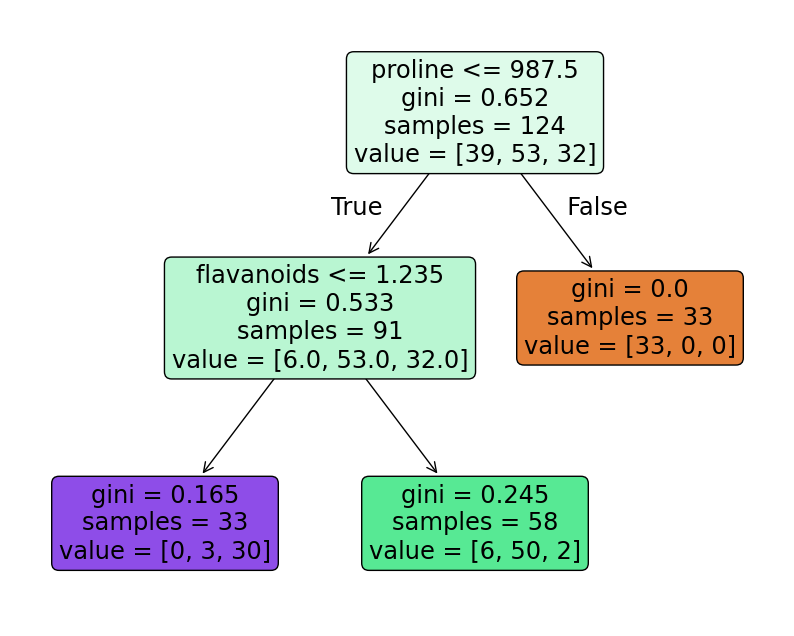

In [35]:
plot_tree(dt_classifier, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [36]:
f1 = 0.652*1 - 91/124*0.533 - 33/124*0
f1

0.2608467741935484

In [37]:
f2 = 0.533*91/124 - 0.165*33/124 - 0.245*58/124
f2

0.23264516129032256

In [38]:
f1/(f1+f2)

0.5285735296520845

In [39]:
f2/(f1+f2)

0.4714264703479156

# <font size=6 color='green'> **Влияет ли стандартизация (масштабирование) признаков на результат работы решающего дерева?**

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
sc = StandardScaler()
X_train_scaled = pd.DataFrame(
    sc.fit_transform(X_train), columns=X_train.columns, index=X_train.index
)
X_test_scaled = pd.DataFrame(
    sc.transform(X_test), columns=X_test.columns, index=X_test.index
)
X_train_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
110,-1.878979,1.161398,-1.958366,0.013210,0.669727,1.439035,0.606807,-0.963773,3.401659,-0.876875,-0.976929,0.303212,-0.549673
98,-0.755256,-1.088679,-0.914546,-0.274160,-0.719249,1.976553,1.811617,-0.963773,0.641106,-0.147922,0.282224,0.241802,-0.252457
92,-0.360101,-0.701025,-0.318077,0.358054,-1.304080,-1.406651,-0.546516,1.770592,0.082221,-0.808535,-0.065129,-0.848225,-0.752872
95,-0.631770,-0.709453,-0.541753,-0.130475,4.690444,0.363998,0.287583,-0.320393,2.893582,-1.013553,0.803253,0.026867,0.587633
15,0.800667,-0.465062,1.322213,-0.647741,1.035246,0.917326,0.946625,-0.481238,-0.188753,1.127746,1.324281,0.410679,1.718873


In [42]:
dt = DecisionTreeClassifier(max_depth=3, random_state=my_random_state)
dt.fit(X_train, y_train)
print(
    f"accuracy_score: {accuracy_score(y_test, dt.predict(X_test)):.2f}"
)

accuracy_score: 0.83


In [43]:
pd.DataFrame(
    {"feature": X.columns, "importance": dt.feature_importances_}
).sort_values(by="importance", ascending=False).reset_index(drop=True)

,feature,importance
0,proline,0.519616
1,flavanoids,0.403939
2,hue,0.076445
3,alcohol,0.000000
4,malic_acid,0.000000
5,ash,0.000000
6,alcalinity_of_ash,0.000000
7,magnesium,0.000000
8,total_phenols,0.000000
9,nonflavanoid_phenols,0.000000


In [44]:

dt_sc = DecisionTreeClassifier(max_depth=3, random_state=my_random_state)
dt_sc.fit(X_train_scaled, y_train)
print(
    f"accuracy_score: {accuracy_score(y_test, dt_sc.predict(X_test_scaled)):.2f}"
)

accuracy_score: 0.83


In [45]:
pd.DataFrame(
    {"feature": X.columns, "importance": dt_sc.feature_importances_}
).sort_values(by="importance", ascending=False).reset_index(drop=True)

,feature,importance
0,proline,0.519616
1,flavanoids,0.403939
2,hue,0.076445
3,alcohol,0.000000
4,malic_acid,0.000000
5,ash,0.000000
6,alcalinity_of_ash,0.000000
7,magnesium,0.000000
8,total_phenols,0.000000
9,nonflavanoid_phenols,0.000000


# <font size=6 color='green'> **Визуализация**

In [46]:
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=my_random_state)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=12345)

In [47]:
text_representation = export_text(dt_classifier)
print(text_representation)

|--- feature_12 <= 987.50
|   |--- feature_6 <= 1.24
|   |   |--- feature_10 <= 0.93
|   |   |   |--- class: 2
|   |   |--- feature_10 >  0.93
|   |   |   |--- class: 1
|   |--- feature_6 >  1.24
|   |   |--- feature_12 <= 744.00
|   |   |   |--- class: 1
|   |   |--- feature_12 >  744.00
|   |   |   |--- class: 0
|--- feature_12 >  987.50
|   |--- class: 0



C:\Program Files\Graphviz

In [48]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz'

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\user\AppData\Local\Temp\ipykernel_28348\4222962943.py:2: SyntaxWarning: invalid escape sequence '\P'
  os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz'


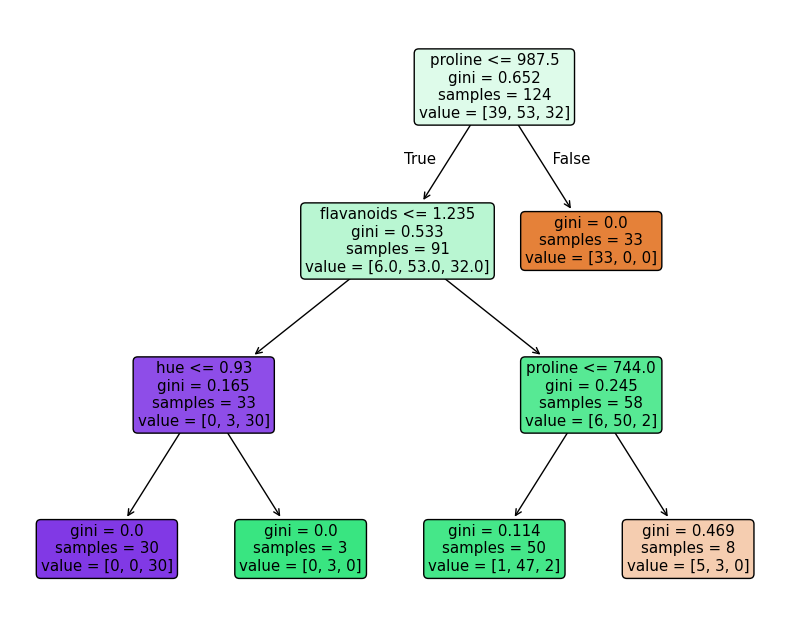

In [49]:
# второй способ отрисовать деревья с помощью plot_tree
plot_tree(dt_classifier, feature_names=X.columns, filled=True, rounded=True)
plt.show()

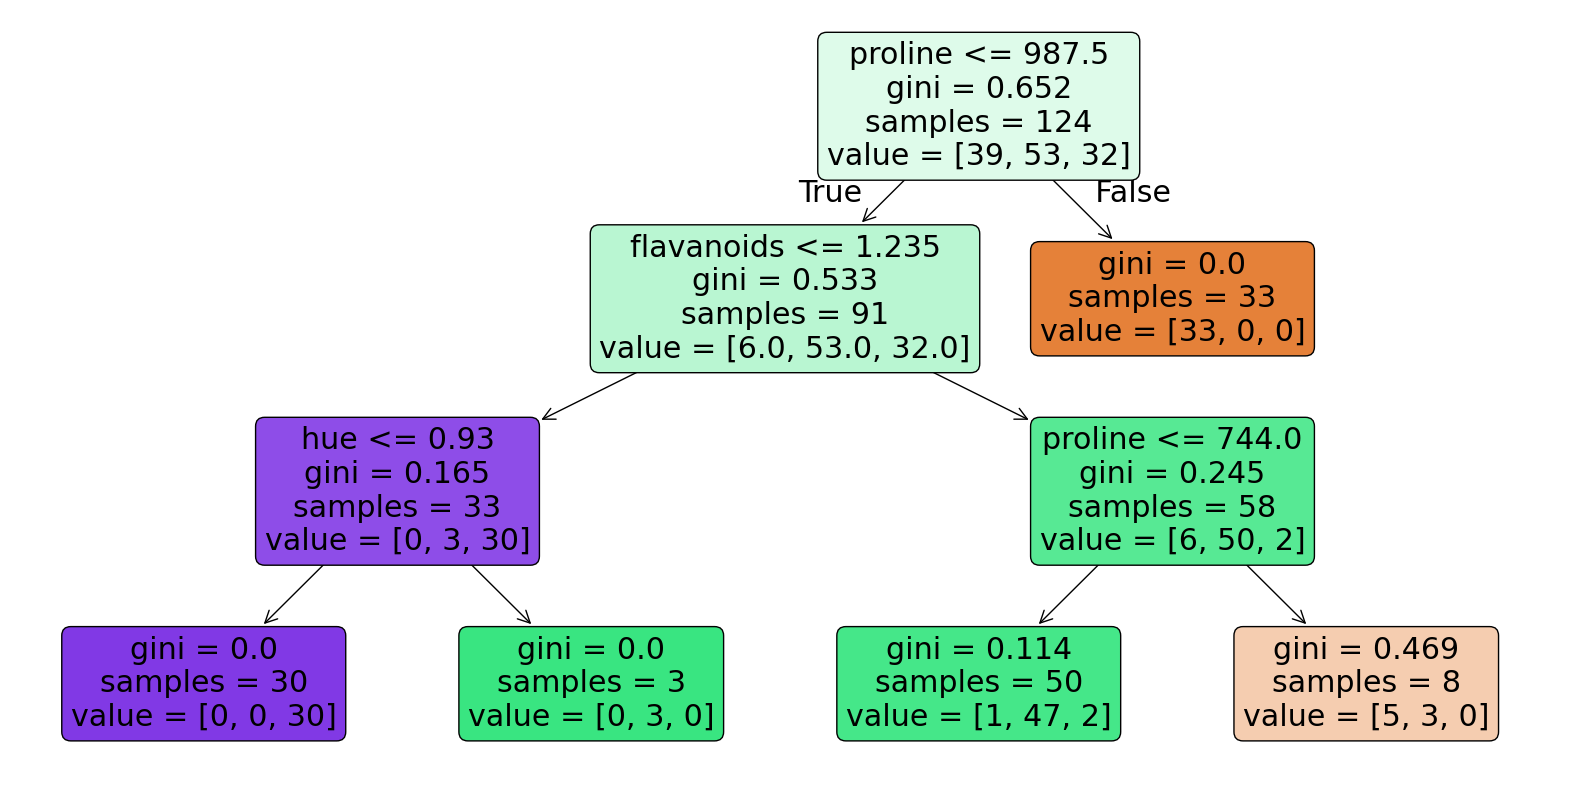

In [50]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Отрисовка дерева
plt.figure(figsize=(20, 10))  # Установка размера графика
plot_tree(
    dt_classifier, 
    feature_names=X.columns, 
    filled=True,  # Заполнение узлов цветом в зависимости от класса
    rounded=True  # Закругленные углы у прямоугольников узлов
)

# Сохранение графика в файл
plt.savefig('tree_plot.png', bbox_inches='tight')

plt.show()


In [51]:
from sklearn.tree import export_graphviz
import graphviz

# Экспорт дерева в формат .dot
export_graphviz(
    dt_classifier, 
    out_file='tree.dot', 
    feature_names=X.columns, 
    filled=True, 
    rounded=True
)


```dot -Tpdf tree.dot -o tree.pdf```

Отобразить dot в pdf через консоль

In [52]:
X_train.columns[12]

'proline'

In [76]:
# Экспорт дерева решений в текстовое представление
text_representation = export_text(dt_classifier, feature_names=X.columns)

# Вывод текстового представления дерева решений в консоль
print(text_representation)


|--- proline <= 987.50
|   |--- flavanoids <= 1.24
|   |   |--- hue <= 0.93
|   |   |   |--- class: 2
|   |   |--- hue >  0.93
|   |   |   |--- class: 1
|   |--- flavanoids >  1.24
|   |   |--- proline <= 744.00
|   |   |   |--- class: 1
|   |   |--- proline >  744.00
|   |   |   |--- class: 0
|--- proline >  987.50
|   |--- class: 0



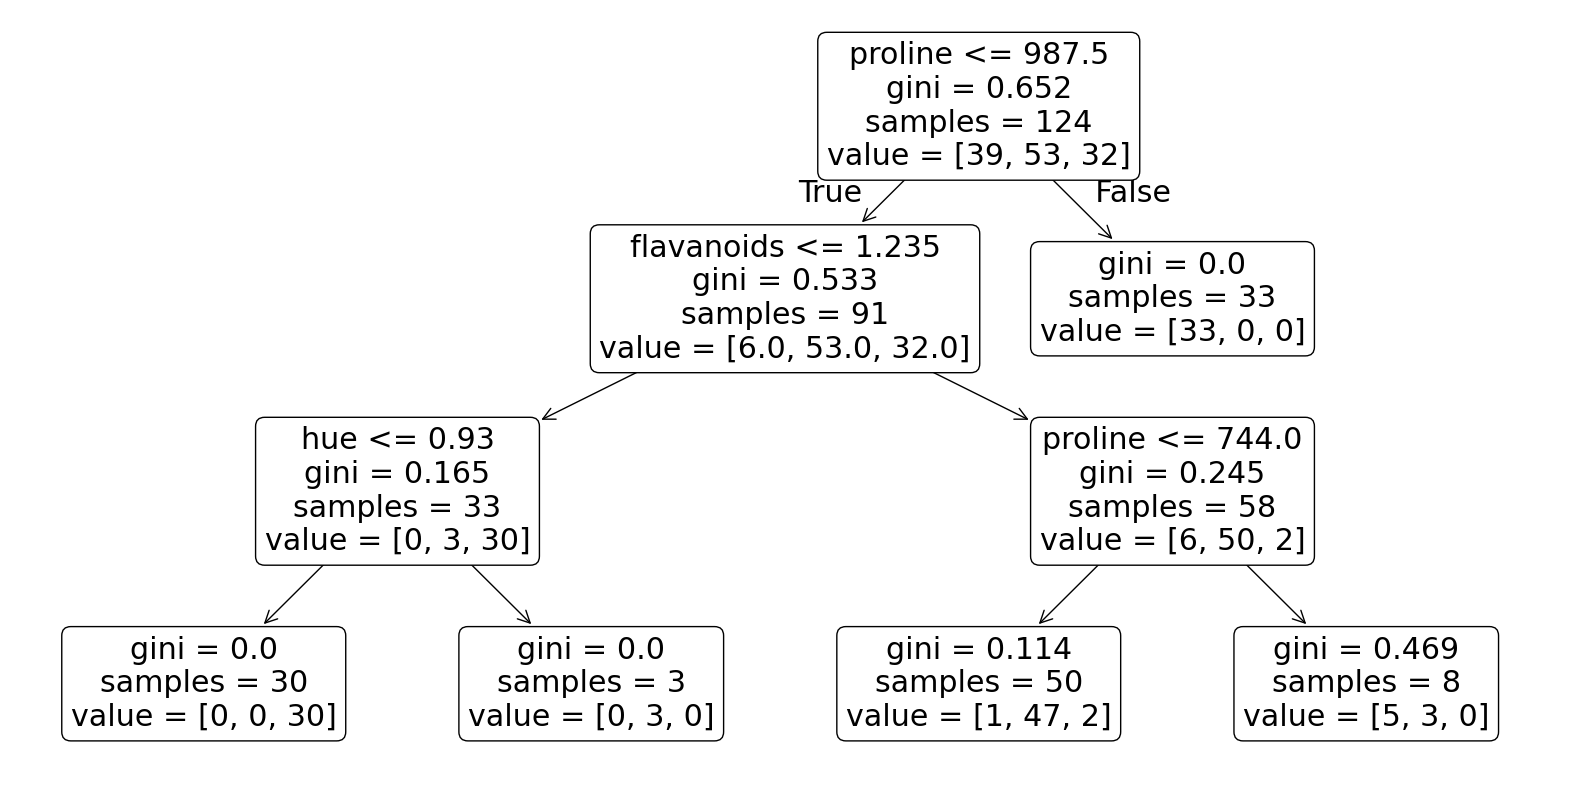

In [75]:
# второй способ отрисовать деревья с помощью plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, 
          feature_names=X.columns,
        #   filled=True,
          rounded=True)
plt.show()